## Problem Statement
Over the relatively short 118 year history of powered human flight, the human race has achieved the unachievable time and again. From the first slow short hops of the Wright brothers in 1903 to supersonic jet flight only 44 years later, and to the moon only 22 years after that, untold numbers of people have perished in the advancement of aviation technology. These days, we think almost nothing of boarding a machine that can fly us at altitudes approaching 40,000 feet at almost the speed of sound to get us from one side of the country to the other in mere hours. While the technology is proven and safe enough for us to not worry about the miniscule chance of a serious problem resulting in a devastating outcome, those problems do still arise. There are many causes for aviation mishaps and accidents, and whenever one occurs, investigators gather every possible data point that could lead to a better understanding of what happened and how to prevent it in the future.


## Data Sets
For this exercise, I will be analyzing aviation mishap data sets provided by the Federal Aviation Administration (FAA) Aviation Safety Information Analysis and Sharing (ASIAS) system. This system provides links to multiple source databases provided from the FAA, the National Transportation Safety Board (NTSB), the Bureau of Transportation Statistics (BTS), and the National Aeronautics and Space Administration (NASA), among others, that track various safety issues and incident and accident reports.

## Sample Questions I Seek to Answer
I will begin with exploring the data and producing summary statistics .

Questions to answer:
What are the top 10 most common accidents or incidents?
Of the top 10 most common events, what are the top general causes?
What are the top primary causal factors? Contributing factors? Supporting factors?
What is the most deadly event type? Which results in the most injuries?
What are the top primary causal factors for the most fatal and injurious events?

Does the time of day (in local time) affect rates of accident or incident?
Does the time of year?

Does the level of pilot qualification make a difference?
Does the pilot's experience? (measured in total pilot time)

What are the most prevalent accident and incident types for each of the top 5 aircraft models?

More advanced and difficult questions I'd like to answer if I can:
Are there significant groupings of primary and secondary contributing factors in aviation mishaps when looking at different types of mishaps? For example, do stall or spin mishap types occur more frequently when there is a specific combination of contributing factors (e.g., pilot-based features, aircraft-based features, weather-based features)?

This would suggest that there are specific contributing factors (or groups of factors) that, if focused on via training or other resources, would have a more significant impact on aviation mishap rates for the most common or most severe/fatalmishap types.

Overall analysis:
Most common accident? Incident? both?
Most deadly accident type? Incident type? both? (fatalities

Of these most common, what are the combinations of contributing factors most prevalent for these A/Is?

Questions for follow-up:
Pilot analysis:
Does the total flight time (flight hours) of the pilot make a difference? 
Does the total number of flight hours in make/model make a difference?
Does the number of flight hours in the preceeding 90 days make a difference?

Aircraft Analysis:
Aircraft type make a difference? 
Engine?


## Challenges
1. There are several data sets provided from multiple organizations that are each very large. This required a thorough study of each data set thoroughly to determine the best combination of data and questions to ask.

2. The analysis is further complicated by the fact that the main data set refers to multiple other tables that interpret the various codes recorded in the main table. I discovered that there were additional columns in the data set that provided text for the various encoded information.

3. There were many blank areas within the data set, and the data is mostly categorical in nature. I removed observations where there was no information on accident type or general causal factor.


## Project Execution
This project required me to look at many different data sets from the NTSB, FAA, BTS, and NASA. I selected a dataset from the FAA's Accident/Incident Database (AIDS). This database is very thorough and spans many years (pre-1975, then each year through 2015). I began by looking at the data download site at http://av-info.faa.gov/dd_sublevel.asp?Folder=%5CAID.

The data is broken down by year groups, with one text file (tab delimited) per 5 year time period. The resulting data set is massive. I began by choosing the most recent year group (2015 - 2019) which includes incidents up to July 29th, 2017. Upon further analysis (~3 hours) of this file, I determined that many data fields I was interested in were missing, most likely due to recent changes in how the data is reported and stored in this database. I then looked back and a previous date range (2005-2009) and selected that file for further analysis. This file contains 15,782 rows and 180 columns.

I considered combining all data files into one DataFrame for analysis, but for the scope of this project, I chose to keep my analysis to a single file with incidents from 2005-2009. In the future, it would be interesting to conduct the same analysis on the combined data set to look at the trends of accidents and incidents over time.

In [29]:
# Import sample data file from FAA Accident/Incident Database (AIDS):
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
url = './data/A2005_09.txt'
faa_full = pd.read_table(url, sep='\t')

In [30]:
faa_full.shape

(15782, 180)

# Data Familiarization and Munging Phase
### Getting Familiar With the Data
In this phase I examined basic information about the data set. After I pulled the data into my notebook, I found that I did not need most of the 180 columns. I imported the data dictionary from a text file into a spreadsheet (./data/Data Dictionary.xlsx) and looked at the columns to determine those I could drop for the main data set. I annotated the spreadsheet with my keep/drop decisions by coloring the features I wished to keep as green, and those to drop as red. I also categorized the features by pilot-related characteristics, aircraft-related characteristics, and added other notes. Finally, I added a column to the dictionary to sort it. This was necessary because I noticed that related features were not located next to each other in the downloaded data set. For example, the Primary Cause Factor text (c77) and Primary Cause Factor Code (c78) were stored as columns 146 and 122, respectively. Sorting the data dictionary allowed me to easily identify these related columns and extract only the features I wanted to analyze.

To facilitate the selection process I looked at value_counts() for each feature and compared the results to the Data Dictionary to get a feel for the data contained within and to further inform the features I would keep or drop. Based on sorting and analyzing value_counts, I realized that there were multiple columns that represented the same data. For example, several date and time fields were represented as both separate year, month, day, time columns and again as a combined column. Also, many of the columns are encoded (key is found in './data/AIDCODES.doc') with the same data recorded in plain text in another column. In these cases, I chose to keep the plain text and drop the encoded column.
### Munging
Once I completed my initial look at the data and the data dictionary, I went through the following steps to make it more manageable:
1. I dropped the columns I determined I would not need for this analysis.
2. I renamed the remaining columns to plain-language names
3. I dropped all rows that did not have any primary causal factors listed.
4. I dropped rows with no accident type listed.

As some of the questions I wanted to examine would need some features while others would not, I kept the 'faa' dataset as whole as possible, and peeled off subsets of the data into separate dataframes as needed for my analysis.

In [31]:
#Data Munging Phase

#Drop 137 unwanted columns from dataset, leaving 43.

#I broke up the list of columns I wanted to drop as I determined them to reduce my chances of error.
droplist = ['c2','c3','c4','c5','c6','c7','c8','c11','c12','c13','c14','c15','c16','c17','c18','c19','c22','c25']
droplist = droplist + ['c26','c27','c30','c32','c33','c34','c35','c36','c37','c38','c39', 'c41','c43','c44','c45','c46','c47','c49']
droplist = droplist + ['c51','c52','c57','c58','c59','c61','c62','c63','c64','c65','c66','c67','c68','c69','c70','c71','c72','c73']
droplist = droplist + ['c74','c75','c78','c80','c82','c84','c86','c88','c90','c96','c98','c101','c102','c103','c104']
droplist = droplist + ['c106','c108','c110','c111','c112','c113','c114','c115','c117','c118','c119','c120','c121','c122','c123','c124']
droplist = droplist + ['c125','c126','c127','c128','c129','c131','c132','c133','c134','c135','c136','c137','c138','c139','c140']
droplist = droplist + ['c141','c143','c144','c145','c146','c147','c149','c152','c153','c154','c155','c157','c160','c162','c184','c192']
droplist = droplist + ['c203','c204','c205','c206','c207','c208','c210','c214','c229','c230','c233','c234','c240','c241','c242']
droplist = droplist + ['c243','c244','c790','end_of_record','c92','c94','c100']
faa_full = faa_full.drop(droplist, axis=1)

In [32]:
faa_full.shape

(15782, 42)

In [33]:
# I created plain-language column names that aligned with the data dictionary added them in the same order as the columns
columnlist=['event_type','date','local_time','num_engines','make','model','airframe_hours','lat','long']
columnlist = columnlist + ['fatalities','injuries','pilot_age','pilot_total_hours_model','pilot_90_day_hours_model']
columnlist = columnlist + ['pilot_90_day_hours','pilot_total_hours','flight_plan_desc','pilot_cert','pilot_qual']
columnlist = columnlist + ['primary_cause','contributing_factor','persons_involved','supporting_factor_technical']
columnlist = columnlist + ['second_cause','second_contributing','second_persons','second_supporting_technical']
columnlist = columnlist + ['accident_type','flight_phase','damage','general_cause','primary_flying_conditions']
columnlist = columnlist + ['second_flying_conditions','light_condition','wing_info','powered','engine_type']
columnlist = columnlist + ['landing_gear','additional_cause','2nd_additional_cause','supporting_factor_operational']
columnlist = columnlist + ['second_supporting_operational']
len(columnlist)

42

In [34]:
faa_full.columns = columnlist # Renamed columns

In [35]:
faa_full.head() # Sanity check on column labels

,event_type,date,local_time,num_engines,make,model,airframe_hours,lat,long,fatalities,...,second_flying_conditions,light_condition,wing_info,powered,engine_type,landing_gear,additional_cause,2nd_additional_cause,supporting_factor_operational,second_supporting_operational
0,I,20050101,1215,2.0,GULSTM,GIV,NaN,NaN,NaN,0,...,Weather Not A Factor,Day,MONOPLANE-LOW WING,POWERED,,Wheeled-Tricycle,,,,
1,I,20050101,1430,1.0,ICA,IAR823,1820.0,NaN,NaN,0,...,Weather Not A Factor,Day,MONOPLANE-LOW WING,POWERED,RECIPROCATING-OPPOSED,Wheeled-Tricycle,,,,
2,A,20050101,1400,1.0,MAULE,M7235B,NaN,06151N,14751W,0,...,Weather Not A Factor,,MONOPLANE-HIGH WING/PARA WING,POWERED,RECIPROCATING-OPPOSED,Wheeled-Conventional,,,,
3,I,20050101,1630,1.0,PIPER,PA28R180,1919.0,NaN,NaN,0,...,Weather Not A Factor,Day,MONOPLANE-LOW WING,POWERED,RECIPROCATING-OPPOSED,,,,,
4,A,20050101,1122,2.0,CESSNA,551,NaN,NaN,NaN,0,...,Freezing Temperature,Day,MONOPLANE-LOW WING,POWERED,TURBOFAN/TURBOJET BYPASS,,,,,Pilot and Ground Cre


In [36]:
# I replaced all blank values in the primary cause and accident type columns with NaN

# In order to determine what exactly was in the blank values, I used:
# causes = pd.DataFrame(faa_full.general_cause.value_counts())
# causes.index
# Then I copied the number of spaces into the replace statement below:
# faa_full.replace('                    ', np.nan, inplace=True)
# I dropped all rows that did not have any primary cause listed (which are now NaN) and put them in a new df, "faa"
# faa = faa_full.dropna(subset=['general_cause'])

#Later, (after much pain) I found that I could strip all the whitespace across the DataFrame with a function:
def df_strip(df): 
  df = df.copy() 
  for c in df.columns:
    if df[c].dtype == np.object:
      df[c] = pd.core.strings.str_strip(df[c])
    #df = df.rename(columns={c:c.strip()})
  return df

faa_full = df_strip(faa_full); # Calls above function to strip whitespace
faa_full.replace('', np.nan, inplace=True) # Replaces empty cells with NaN
# Then I could easily replace the blank cells with NaN, and drop any columns or rows easily.

In [37]:
faa_full.dropna(subset=['general_cause','accident_type'], inplace=True)

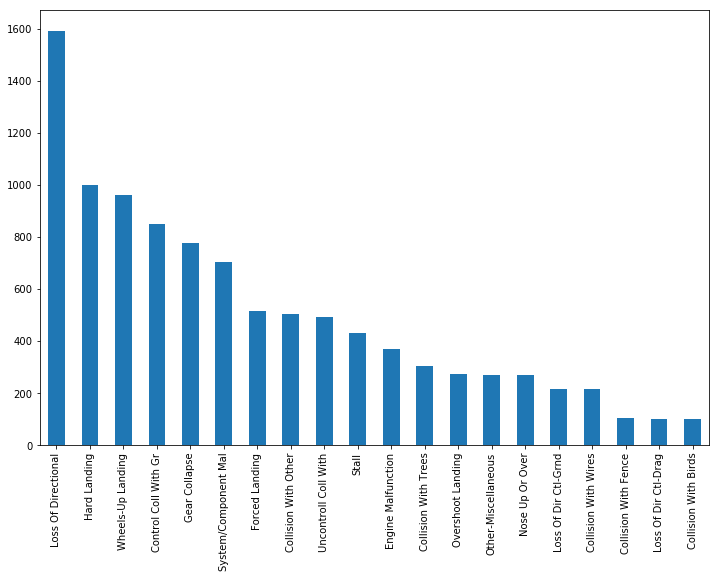

In [54]:
# Plot showing the top 20 types of accidents
faa_full.accident_type.value_counts().head(20).plot(kind='bar', figsize = (12,8))

In [56]:
fatal_accidents = faa_full[faa_full['fatalities'] > 0]

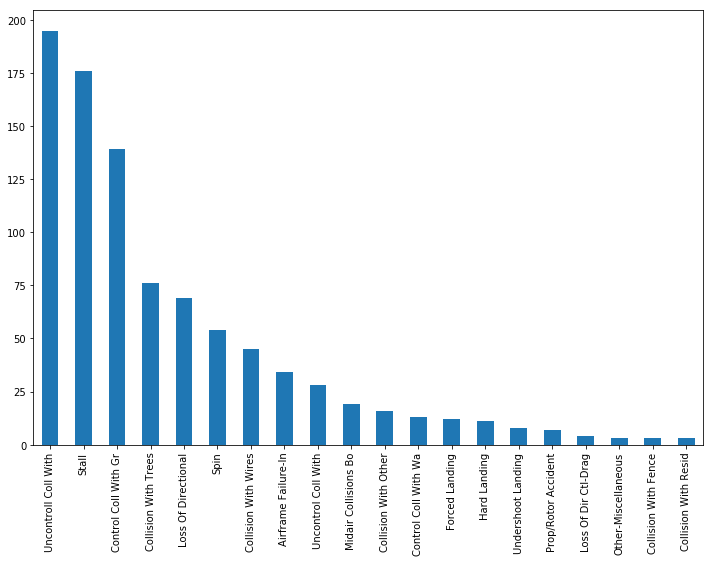

In [61]:
# Plot showing the top 20 fatal accidents, by # of occurrences
fatal_accidents.accident_type.value_counts().head(20).plot(kind='bar', figsize = (12,8))

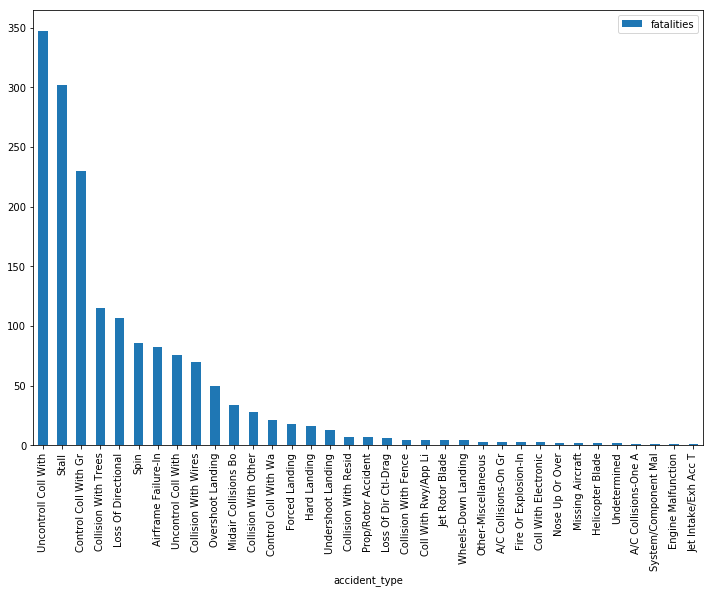

In [88]:
# Plot of fatal accident types, by total number of fatalities. Of note, 
fatal_accidents[['accident_type', 'fatalities']].groupby('accident_type').sum().sort_values('fatalities',ascending=False).plot(kind='bar', figsize=(12,8))

,date,num_engines,airframe_hours,fatalities,injuries,pilot_age,pilot_total_hours_model,pilot_90_day_hours_model,pilot_90_day_hours,pilot_total_hours
count,9.370000e+02,891.000000,602.000000,937.000000,937.000000,925.000000,693.000000,7.000000,662.000000,822.00000
mean,2.006329e+07,1.140292,4445.800664,1.766275,0.221985,52.061622,438.225108,25.857143,37.676737,3303.39781
std,1.048523e+04,0.387245,6704.521219,1.945797,0.648657,14.811495,1166.747058,25.347114,64.631234,5623.10164
min,2.005010e+07,0.000000,1.000000,1.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.00000
25%,2.005101e+07,1.000000,599.500000,1.000000,0.000000,43.000000,0.000000,7.500000,0.000000,300.00000
50%,2.006091e+07,1.000000,2856.500000,1.000000,0.000000,54.000000,64.000000,9.000000,12.000000,1000.00000
75%,2.007082e+07,1.000000,5399.250000,2.000000,0.000000,63.000000,296.000000,48.000000,43.000000,3492.50000
max,2.008082e+07,2.000000,71116.000000,49.000000,8.000000,88.000000,13000.000000,60.000000,467.000000,40500.00000
